<a href="https://colab.research.google.com/github/FerrazThales/DepressionSymptosAnalysis/blob/main/An%C3%A1lise_sobre_Depress%C3%A3o_nos_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>Encontre eu e meus projetos nas redes sociais!</b></h1>
<table>
  <tr>
  <td><a href="https://thalesferraz.medium.com/">
  <img src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true" width="900" title="Olá, Meu nome é Thales e sou cientista de Dados!"/>
  </a>
  </td>
  <td><a href="https://github.com/FerrazThales">
  <img vspace=110 src="https://github.com/FerrazThales/FerrazThales/blob/main/GitHub.jpg?raw=true" width="80%" title="Entre em meu Github e veja mais projetos!" /> 
  </a>
  </td>
  <td>
  <a href="https://thalesferraz.medium.com/">
  <img vspace=110 src="https://github.com/FerrazThales/FerrazThales/blob/main/medium.png?raw=true" width="800" title="Veja alguma dicas publicadas no Medium!"/>
  </a>
  </td>
  <td><a href="https://www.linkedin.com/in/thalesdefreitasferraz/"><img vspace=150 src="https://github.com/FerrazThales/FerrazThales/blob/main/linkedin.png?raw=true" width="80%" title="Vamos trocar uma idéia sobre Data Science no LinkedIn?" />
  </a>
  </td>
  </tr>
</table>

# O que você vai ver neste projeto:

* Uma análise estatística dos dados da **National Health and Nutrition Examination Survey** (NHANES).
* A realização de **testes de hipóteses** em Python.
* A Análise de Variância (ANOVA) e testes **Post Hoc**.
* A avaliação entre a **associação** de duas variáveis **categóricas** através do teste qui-quadrado de independência.
* O cálculo de intervalos de confiança utilizando **Bootstrap**.



<p align=center>
<img src="https://img.freepik.com/free-vector/depression-concept-illustration_114360-3747.jpg?w=740&t=st=1673039462~exp=1673040062~hmac=8576f81b84bcd61b817fb01a3d0a55628493ad5852751bf0d84dde4e1e31a4cb" width=35%>
</p>


A [National Health and Nutrition Examination Survey](https://www.cdc.gov/nchs/nhanes/about_nhanes.htm) - NHANES - é uma grande pesquisa conduzida nos Estados Unidos e serve para entender o estado atual da saúde e nutrição da população civil. Este tipo de pesquisa monitora às tendências nas condições de saúde da população e avalia as mudanças na saúde pública e na prática clínica.

Um dos questionários utilizados neste estudo é o [PHQ-9](https://dranadimme.com.br/teste-de-depressao-phq-9/). Este questionário é um instrumento altamente utilizado para avaliar um estado clínico de depressão. Ele é composto por [09 perguntas](https://patient.info/doctor/patient-health-questionnaire-phq-9) que avaliam o estado emocional do paciente nas duas últimas semanas. Após preencher o questionário, é realizado o cálculo do score para avaliar o possível nível de depressão do paciente.

Você pode entender melhor como funciona este questionário e sua aplicação através deste trabalho: [The PHQ-9: validity of a brief depression severity measure](https://pubmed.ncbi.nlm.nih.gov/11556941/).

Este projeto faz parte da conclusão do [curso de Estatística](https://www.renatabiaggi.com/) da Profª Renata Biaggi. Nele vamos realizar uma análise estatística através das respostas dadas ao NHANHES entre o ano de 2005 e de 2006. A partir disso, realizaremos alguns testes de hipóteses para inferir algumas suposições sobre a população americana. 

In [1]:
#@title Clique aqui para ver os pacotes utilizados no projeto.

# instalando o pacote pingouin para utilizar a anova welch
!pip install pingouin 1>0

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis,shapiro,levene,ttest_ind,chi2_contingency
import pingouin as pg

# visualizar melhor os gráficos do projeto
%matplotlib inline

In [2]:
#@title Clique aqui para ver funções e listas auxiliares utilizadas no projeto.

# função que auxilia a calcular o score da depressão
def level(score):

  if score < 5:
    level = 'minimal'
  elif score >= 5 and score < 10:
    level = 'mild'
  elif score >= 10 and score < 15:
    level = 'moderate'
  elif score >= 15 and score < 20:
    level = 'moderately severe'
  else:
    level = 'severe depression'

  return level

# função para criar rótulos  -> https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
def rotulos(ax, y, distancia, titulo):
  ax.get_yaxis().set_visible(False)
  ax.set_frame_on(False)
  ax.tick_params(axis='both',colors='grey',length=0,labelsize=12)
  ax.set_title(titulo,loc='left',pad=30,fontdict={'fontsize':16},color='#474747')
  for i in range(len(y)):
        ax.text(i,y[i] + distancia,'{:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=16,color='grey')

# função que colore o fundo do DataFrame
def highlight_cells(val):
  # https://towardsdatascience.com/a-quick-and-easy-guide-to-conditional-formatting-in-pandas-8783035071ee
    back_color = 'red' if val >= 0.01 else ''
    text_color = 'yellow' if val >= 0.01 else ''
    return 'color: {}; background-color: {}'.format(text_color,back_color)

# lista com as respostas padrão do questionário
respostas_questionarios = ['Nenhuma vez',
                           'Menos de uma semana',
                           'Uma semana ou mais',
                           'Quase todos os dias']

#1. Importando as Bases de Dados

In [3]:
# guardando o endereço das base de dados do github
base_01_path = "https://raw.githubusercontent.com/FerrazThales/DepressionSymptosAnalysis/main/DataBase/DEMO_PHQ.csv"
base_02_path = "https://raw.githubusercontent.com/FerrazThales/DepressionSymptosAnalysis/main/DataBase/PAG_HEI.csv"

# armazenando em uma variável
df = pd.read_csv(base_01_path), pd.read_csv(base_02_path)

# Print da quantidade de registro e de features
print('-'* 30)
for i in range(2):
  print('{}ª BASE DE DADOS'.format(i+1))
  print('Registros: {:,} - Features: {}'.format(df[i].shape[0], df[i].shape[1]))
print('-'* 30)

------------------------------
1ª BASE DE DADOS
Registros: 5,334 - Features: 15
2ª BASE DE DADOS
Registros: 9,424 - Features: 17
------------------------------


### Dicionário das Bases de Dados
```
Dicionário da Primeira Base de dados:

  SEQN: Identificador do respondente.

  Questões do PHQ-9 (DPQ010 - DPQ090):
  Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir:

  DPQ010: Pouco interesse ou pouco prazer em fazer as coisas.
  DPQ020: Se sentiu pra baixo, deprimido e sem perspectiva.
  DPQ030: Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o de costume.
  DPQ040: Se sentiu cansado ou com pouca energia.
  DPQ050: Falta de Apetite ou gula. 
  DPQ060: Se sentiu mal consigo mesmo ou achou que é um fracasso ou que decepcionou sua família ou você mesmo.
  DPQ070: Dificuldade para se concentrar nas coisas (ex: ler jornal ou ver televisão)
  DPQ080: Teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem) ou ficou muito mais agitado que o costume.
  DPQ090: Pensou em se ferir de alguma maneira ou que seria melhor estar morto.

  Possíveis respostas:
  0 =  Nenhuma vez   1 = Menos de uma semana   2 = Uma semana ou mais   3 = Quase todos os dias   7 = Se recusou a responder   9 = Não sabe

  RIAGENDR: Gênero
     1 = Masculino   2 = Feminino
  RIDAGEYR: Idade em Anos
  RIDRETH1: Raça/Etnia
    1 = Branco não-hispânico   2 = Negro não-hispânico   3 = Mexicano-americano   4 = Outro   5 = Outro - Hispânico
  DMDEDUC: Escolaridade
    1 = Menor que 9º Ano   2 = 9-12º ano   3 = Ensino Médio   4 = Ensino Superior Incompleto   5 = Superior Completo ou maior
    7 = Se recusou a responder   9 = Não sabe
  INDFMINC: Renda Anual Familiar (US$)
    1 = 0 - 4.999   2 = 5.000 - 9999   3 = 10.000 - 14.999   4 = 15.000 - 19.999   5 = 20.000 - 24.999   6 = 25.000 - 34.999
    7 = 35.000 - 44.999   8 = 45.000 - 54.999   9 = 55.000 - 64.999   10 = 65.000 - 74.999   11 = Maior ou igual a 75.000
    12 = Maior que 20.000   13 = Menor que 20.000   77 = Se recusou a responder   99 = Não sabe

Dicionário da Segunda Base de dados:
  
  SEQN: Identificador do respondente.
  PAG_MINW: Tempo semanal de atividade aeróbica moderada-vigorosa em minutos segunda o Physical Acitivity Guideline (PAG).
  ADHERENCE: Grupo de Aderência ao Physical Activity Guideline (PAG)
    1 = Baixo (< 150 min/semana)   2 = Adequado (150 - 300 min/semana)   3 = Acima  (>300 min/semana)

  HEI2015C1_TOTALVEG: Healthy Eating Index - Total de Vegetais (0-5)
  HEI2015C2_GREEN_AND_BEAN: Healthy Eating Index - Verduras verde-escuras e leguminosas (0-5)
  HEI2015C3_TOTALFRUIT: Healthy Eating Index - Frutas Totais (0-5)
  HEI2015C4_WHOLEFRUIT: Healthy Eating Index - Frutas in natura (0-5)
  HEI2015C5_WHOLEGRAIN: Healthy Eating Index - Grãos Integrais (0-10)
  HEI2015C6_TOTALDAIRY: Healthy Eating Index - Laticínios (0-10)
  HEI2015C7_TOTPROT: Healthy Eating Index - Proteínas (0-5)
  HEI2015C8_SEAPLANT_PROT: Healthy Eating Index - Plantas (0-5)
  HEI2015C9_FATTYACID: Healthy Eating Index - Ácido-graxo (0-10)
  HEI2015C10_SODIUM: Healthy Eating Index - Sódio (0-10)
  HEI2015C11_REFINEDGRAIN: Healthy Eating Index - Grãos refinados (0-10)
  HEI2015C12_SFAT: Healthy Eating Index - Gordura Saturada (0-10)
  HEI2015C13_ADDSUG: Healthy Eating Index - Açucares Adicionados (0-10)
  HEI2015_TOTAL_SCORE: Healthy Eating Index - Score Total (0-100)
```

#### Visualizando as bases de dados

In [4]:
# Visualizando as 3 primeiras entradas da primeira base de dados
df[0].head(3)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0


In [5]:
# Visualizando as 3 primeiras entradas da segunda base de dados
df[1].head(3)

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Já de início, percebemos que temos algumas pessoas que **aparecem** na primeira e na segunda base de dados. Nós queremos avaliar não só as questões relacionadas ao **questionário PHQ-9** dos mais de 5 mil adultos da primeira base de dados, mas também temas referentes a alimentação. 

Portanto, será necessário **agrupar** as duas bases de dados.

## Agrupando as Bases de dados

In [6]:
# verificando se todos os valores da primeira base estão na segunda base de dados
# assert: caso dê erro, o código não irá ser executado
assert df[1].SEQN.isin(df[0].SEQN).sum() == df[0].shape[0]

# agrupando as duas bases de dados
df_new = pd.merge(df[0],df[1], how = 'inner')

# verificando a nova base de dados
print('Nova Base de Dados')
print('Linhas: {:,} - Colunas: {}'.format(df_new.shape[0], df_new.shape[1]))
print()

# visualizando a nova base de dados
df_new.head(3)

Nova Base de Dados
Linhas: 5,334 - Colunas: 31



,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [7]:
# separando o nome das colunas que envolvem as perguntas
columns_name = df_new.columns[:10]
columns_name

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090'],
      dtype='object')

In [8]:
# verificando valores nulos das perguntas
(df_new[columns_name[1:]].isnull().sum()).sort_values(ascending=False).to_frame('Quantidade de Nulos')

,Quantidade de Nulos
DPQ010,498
DPQ020,498
DPQ030,498
DPQ040,498
DPQ050,498
DPQ060,498
DPQ070,498
DPQ080,498
DPQ090,498


In [9]:
# Excluindo os valores nulos
df_new.dropna(subset = columns_name[1:], inplace = True)

# visualizando as 3 primeiras entradas após a exclusão dos valores nulos
df_new.head(3)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826


Como estamos preocupados em relacionar muitas das questões relacionadas ao questionário PHQ-9, **nós excluimos os 498 registros** que não possuíam nenhuma informação relevante sobre este tema.

## Criando Novas Variáveis

Conforme o artigo [The PHQ-9: validity of a brief depression severity measure](https://pubmed.ncbi.nlm.nih.gov/11556941/) demonstra, é possível **calcular um score** relacionado a depressão a partir do questionário das 09 perguntas realizadas.

Este score é simplesmente a **soma da pontuação** de cada uma das questões. Para facilitar o cálculo, assumimos que as pessoas que se **recusaram** a responder ou **não responderam** a algumas das perguntas terá a pontuação zerada naquela questão.

Além disso, também será criada uma variável relacionada a **severidade do nível de depressão**. Este nível está intimamente ligado ao resultado do score. Para mais detalhes, consulte o artigo citado.

In [10]:
# se recusou a responder será considerado como pontuação zero
df_new[columns_name[1:]] = df_new[columns_name[1:]].replace(7,0)

# não deu a resposta da pergunta será considerado como pontuação zero
df_new[columns_name[1:]] = df_new[columns_name[1:]].replace(9,0)

# criando o score do PHQ -9 -> https://www.youtube.com/watch?v=q8zvPF87nPc&t=65s
df_new['score'] = np.sum(df_new[columns_name[1:]], axis = 1)

# inserindo o estado de depressão e a severidade da depressão ->  https://pubmed.ncbi.nlm.nih.gov/11556941/
df_new['depression'] = np.where(df_new.score >= 10, 1, 0)
df_new['depression_level'] = [level(x) for x in df_new['score']] # estamos utilizando a função level criada no início do código

# retirando a coluna identificadora(SEQN) que não afetará mais na análise
df_new.drop(columns = ['SEQN'], inplace = True)

# visualizando a base de dados resultante
df_new.head(3)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,score,depression,depression_level
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0,minimal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0,minimal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0,minimal


## Renomeando as colunas de acordo com o dicionário dos dados

Embora no início do projeto tenha sido apresentado um dicionário para cada uma das variáveis, ainda está muito **confuso** manipular grande parte delas. Por conta disso, iremos atualizar o dataset com nomes de colunas mais **legíveis** e **fáceis de interpretar**.

In [11]:
# verificando os nomes das colunas
df_new.columns

Index(['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070',
       'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC',
       'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'score', 'depression',
       'depression_level'],
      dtype='object')

In [12]:
# criando uma lista com nome de colunas mais legíveis a análise
rename_columns = ['Q1 - Pouco Interesse','Q2 - Deprimido', 'Q3 - Insonia ou Sonolencia','Q4 - Cansaco','Q5 - Inapetencia ou Gula',
                  'Q6 - Decepcao','Q7 - Concentracao','Q8 - Lentidao ou Agitacao','Q9 - Automutilacao',
                  'Genero', 'Idade(anos)','Raça/Etnia','Escolaridade','Renda anual familiar (US$)',
                  'Atividade Aerobica (min)','Aderencia ao PAG','Vegetais','Verduras','Frutas','Frutas in Natura',
                  'Grao Integrais','Laticinios','Proteinas','Plantas Marinhas e Proteinas Vegetais','Acido-Graxo','Sodio','Graos refinados',
                  'Gordura saturada','Acucares','Score(HEI)','Score(PHQ-9)','Depressao','Depressao Level']

# renomeando o dataset
df_new.set_axis(rename_columns,axis=1,inplace=True)

# visualizando as 3 primeiras entradas do dataset
df_new.head(3).round(2)

,Q1 - Pouco Interesse,Q2 - Deprimido,Q3 - Insonia ou Sonolencia,Q4 - Cansaco,Q5 - Inapetencia ou Gula,Q6 - Decepcao,Q7 - Concentracao,Q8 - Lentidao ou Agitacao,Q9 - Automutilacao,Genero,...,Plantas Marinhas e Proteinas Vegetais,Acido-Graxo,Sodio,Graos refinados,Gordura saturada,Acucares,Score(HEI),Score(PHQ-9),Depressao,Depressao Level
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,2.05,0.68,2.30,9.51,0.44,3.92,35.55,0.0,0,minimal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0.00,2.05,7.37,8.89,8.19,9.10,63.55,0.0,0,minimal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,1.27,2.96,0.00,5.63,5.86,5.88,42.89,0.0,0,minimal


## Tratando os últimos dados nulos

In [13]:
# verificando dados nulos
df_new.isnull().sum().sort_values(ascending=False)

Vegetais                                 99
Verduras                                 99
Frutas in Natura                         99
Grao Integrais                           99
Laticinios                               99
Proteinas                                99
Plantas Marinhas e Proteinas Vegetais    99
Acido-Graxo                              99
Sodio                                    99
Graos refinados                          99
Gordura saturada                         99
Acucares                                 99
Score(HEI)                               99
Frutas                                   99
Renda anual familiar (US$)               36
Score(PHQ-9)                              0
Depressao                                 0
Q1 - Pouco Interesse                      0
Q2 - Deprimido                            0
Aderencia ao PAG                          0
Atividade Aerobica (min)                  0
Escolaridade                              0
Raça/Etnia                      

In [14]:
# visualizando no dataset quais os valores estão nulos
df_new[df_new["Vegetais"].isnull()]

,Q1 - Pouco Interesse,Q2 - Deprimido,Q3 - Insonia ou Sonolencia,Q4 - Cansaco,Q5 - Inapetencia ou Gula,Q6 - Decepcao,Q7 - Concentracao,Q8 - Lentidao ou Agitacao,Q9 - Automutilacao,Genero,...,Plantas Marinhas e Proteinas Vegetais,Acido-Graxo,Sodio,Graos refinados,Gordura saturada,Acucares,Score(HEI),Score(PHQ-9),Depressao,Depressao Level
28,1.0,1.0,3.0,3.0,3.0,0.0,1.0,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1,moderate
68,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0,minimal
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,minimal
117,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0,minimal
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,minimal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,0.0,3.0,0.0,3.0,3.0,3.0,0.0,1.0,2.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1,moderately severe
5140,0.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0,mild
5161,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0,mild
5214,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,minimal


Por último, percebemos que temos alguns campos que **não foram preenchidos** durante a pesquisa e serão utilizados em nossa análise. Por conta disso, os valores que estiverem vazios serão **retirados** do dataset.

Ademais, notamos que alguns dados da renda anual familiar também estão vazios. Para este caso, vamos substituir pela **mediana**.

In [15]:
# excluindo os dados nulos do questionário da segunda base de dados (ex: Laticínios -> NaN)
df_new.dropna(subset = ['Vegetais'], inplace =  True)

# inserindo a mediana dos valores onde a Renda Anual Familiar é Nula
df_new.fillna(df_new['Renda anual familiar (US$)'].median(),
              inplace = True)

# 2. Análise Exploratória dos Dados

In [16]:
# verificando a tipagem dos dados de nossas variáveis
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4737 entries, 1 to 5333
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Q1 - Pouco Interesse                   4737 non-null   float64
 1   Q2 - Deprimido                         4737 non-null   float64
 2   Q3 - Insonia ou Sonolencia             4737 non-null   float64
 3   Q4 - Cansaco                           4737 non-null   float64
 4   Q5 - Inapetencia ou Gula               4737 non-null   float64
 5   Q6 - Decepcao                          4737 non-null   float64
 6   Q7 - Concentracao                      4737 non-null   float64
 7   Q8 - Lentidao ou Agitacao              4737 non-null   float64
 8   Q9 - Automutilacao                     4737 non-null   float64
 9   Genero                                 4737 non-null   int64  
 10  Idade(anos)                            4737 non-null   int64  
 11  Raça

In [17]:
# separando as variáveis consideradas como categóricas
categoricas = ['Genero','Raça/Etnia','Escolaridade','Renda anual familiar (US$)',
                'Aderencia ao PAG','Depressao','Depressao Level']

# separando as variáveis de perguntas (que também são categóricas)
perguntas = ['Q1 - Pouco Interesse','Q2 - Deprimido', 'Q3 - Insonia ou Sonolencia','Q4 - Cansaco','Q5 - Inapetencia ou Gula',
                'Q6 - Decepcao','Q7 - Concentracao','Q8 - Lentidao ou Agitacao','Q9 - Automutilacao']

# separando as variáveis que são consideradas numéricas através da função 'set'
numericas = list(set(df_new.columns).difference(categoricas,perguntas))

# Visualizando o resultado da separação
print('Quantidade de Variáveis:')
print('Numéricas: {} -  Categóricas: {} - Perguntas: {}'.format(len(numericas), len(categoricas),len(perguntas)))

Quantidade de Variáveis:
Numéricas: 17 -  Categóricas: 7 - Perguntas: 9


## Análise das Variáveis Numéricas

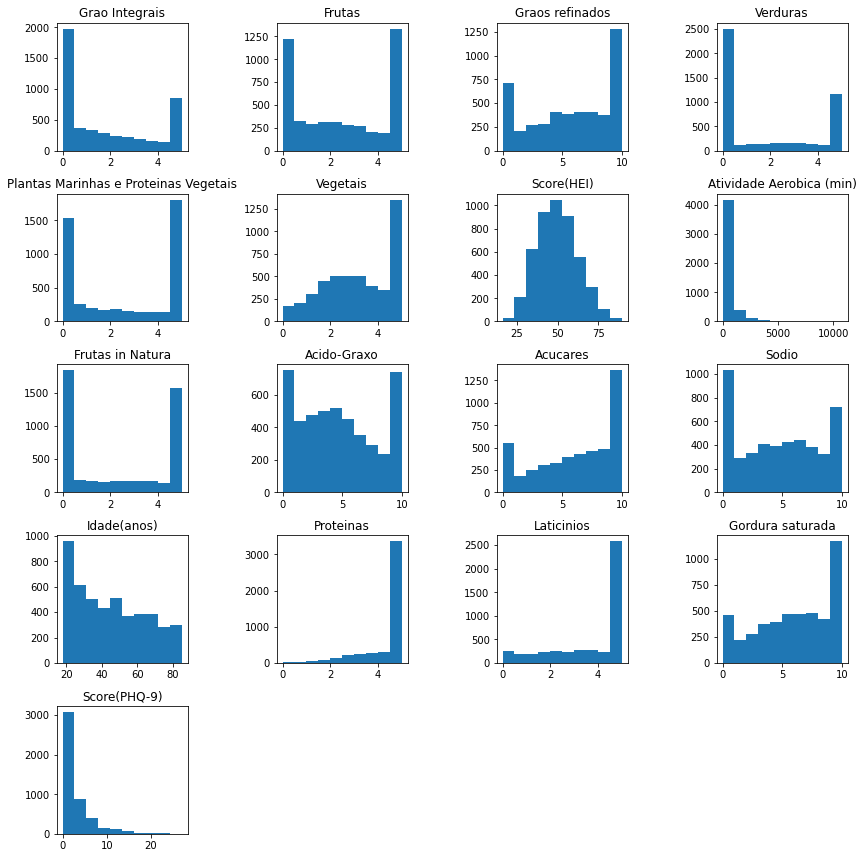

In [18]:
# histogramas das variáveis numéricas
df_new[numericas].hist(figsize = (12,12), grid=False)
plt.tight_layout(pad=1.0);

In [19]:
# verificar a Skew e Kurtosis de Cada Variável
for n in numericas:
  s = skew(df_new[n])
  k = kurtosis(df_new[n])
  print('Variável: {} | Skew: {:.2f} | Kurtosis: {:.2f}'.format(n,s,k))
  print('--'*35)
del n,s,k

Variável: Grao Integrais | Skew: 0.64 | Kurtosis: -1.15
----------------------------------------------------------------------
Variável: Frutas | Skew: 0.07 | Kurtosis: -1.56
----------------------------------------------------------------------
Variável: Graos refinados | Skew: -0.35 | Kurtosis: -1.20
----------------------------------------------------------------------
Variável: Verduras | Skew: 0.58 | Kurtosis: -1.45
----------------------------------------------------------------------
Variável: Plantas Marinhas e Proteinas Vegetais | Skew: -0.03 | Kurtosis: -1.77
----------------------------------------------------------------------
Variável: Vegetais | Skew: -0.28 | Kurtosis: -1.04
----------------------------------------------------------------------
Variável: Score(HEI) | Skew: 0.23 | Kurtosis: -0.31
----------------------------------------------------------------------
Variável: Atividade Aerobica (min) | Skew: 4.59 | Kurtosis: 35.21
------------------------------------------

Pela análise dos **histogramas** e das medidas de **simetria**, percebemos que grande parte dos dados **não seguem** uma distribuição plenamente normal. Principalmente nossa **variável de interesse** que é a `SCORE(PHQ-9)`.

Um fato interessante é que a variável `Idade(anos)` apresenta distribuição assimétrica positiva. Portanto, a maior parte dos entrevistados são **jovens**. Além disso, a variável `Atividade Aerobica (min)` também apresenta os valores concentrados a esquerda, o que pode indicar a presença de **outliers** (tal como visto no histograma) ou a **menor** prática de atividades físicas feitas pelos entrevistados.

In [20]:
# teste de shapiro para verificar a normalidade do índice Score(PHQ-9)
shapiro(df_new['Score(PHQ-9)'])

ShapiroResult(statistic=0.730928361415863, pvalue=0.0)

Com estes resultados do [Teste de Shapiro Wilk](https://psicometriaonline.com.br/o-que-e-o-teste-de-shapiro-wilk/) temos evidências de que esta amostra é diferente de uma distribuição normal.

In [21]:
# estatística descritiva das variáveis numéricas
df_new[numericas].describe().round(1)

,Grao Integrais,Frutas,Graos refinados,Verduras,Plantas Marinhas e Proteinas Vegetais,Vegetais,Score(HEI),Atividade Aerobica (min),Frutas in Natura,Acido-Graxo,Acucares,Sodio,Idade(anos),Proteinas,Laticinios,Gordura saturada,Score(PHQ-9)
count,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0,4737.0
mean,1.8,2.5,5.8,1.8,2.6,3.2,49.9,484.9,2.4,4.7,6.2,4.8,44.8,4.4,3.8,6.0,2.7
std,1.9,1.9,3.5,2.1,2.2,1.5,12.3,797.7,2.2,3.2,3.3,3.4,19.9,1.0,1.6,3.2,3.7
min,0.0,0.0,0.0,0.0,0.0,0.0,16.1,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0
25%,0.0,0.4,3.0,0.0,0.0,2.1,40.9,41.6,0.0,2.0,3.7,1.6,27.0,4.2,2.6,3.7,0.0
50%,1.0,2.3,6.2,0.0,2.6,3.2,49.5,221.7,2.1,4.4,6.8,4.8,43.0,5.0,4.9,6.4,1.0
75%,3.4,4.9,9.3,4.4,5.0,4.8,58.1,582.0,5.0,7.2,9.4,7.6,61.0,5.0,5.0,9.0,4.0
max,5.0,5.0,10.0,5.0,5.0,5.0,89.5,10777.8,5.0,10.0,10.0,10.0,85.0,5.0,5.0,10.0,27.0


A partir da tabela das **estatísticas descritivas**, vemos que grande parte dos dados se encontram no intervalo adequado, **exceto** os valores da variável `Atividade Aerobica (min)`.

In [22]:
# Maximo de Atividade Aeróbica
atividade_aerobica_maxima = df_new['Atividade Aerobica (min)'].max()
print('Tempo em minutos em uma semana completa: {:,}'.format(24*7*60))
print('Tempo de atividade aeróbica máxima do dataset: {:,.2f}'.format(atividade_aerobica_maxima))

Tempo em minutos em uma semana completa: 10,080
Tempo de atividade aeróbica máxima do dataset: 10,777.83


Como visto no código acima, algumas pessoas praticaram mais atividades aeróbicas semanalmente do que o tempo máximo de uma semana, o que é impossível.

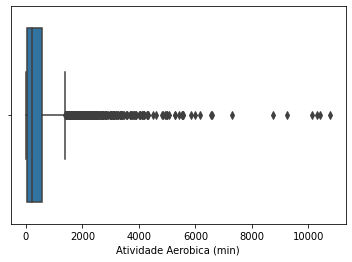

In [23]:
# visualizando os valores desta variável em um boxplot
sns.boxplot(x = df_new['Atividade Aerobica (min)']);

Considerando a existência de atletas profissionais e amadores em nossa base de dados, iremos manter todos os registros que tem atividade aeróbica menores que 8.000 minutos na semana.

In [24]:
# verificando quantas pessoas realizaram atividades maiores que 8000 minutos
maior_que_8000 = (df_new['Atividade Aerobica (min)'] > 8000).sum()
print('{} pessoas realizaram mais que 8.000 minutos de atividade aeróbicas em uma semana e foram retiradas do dataset.'.format(maior_que_8000))

# retirando estas 6 pessoas do dataset
df_new = df_new[df_new['Atividade Aerobica (min)'] <= 8000]

6 pessoas realizaram mais que 8.000 minutos de atividade aeróbicas em uma semana e foram retiradas do dataset.


## Análise das Perguntas

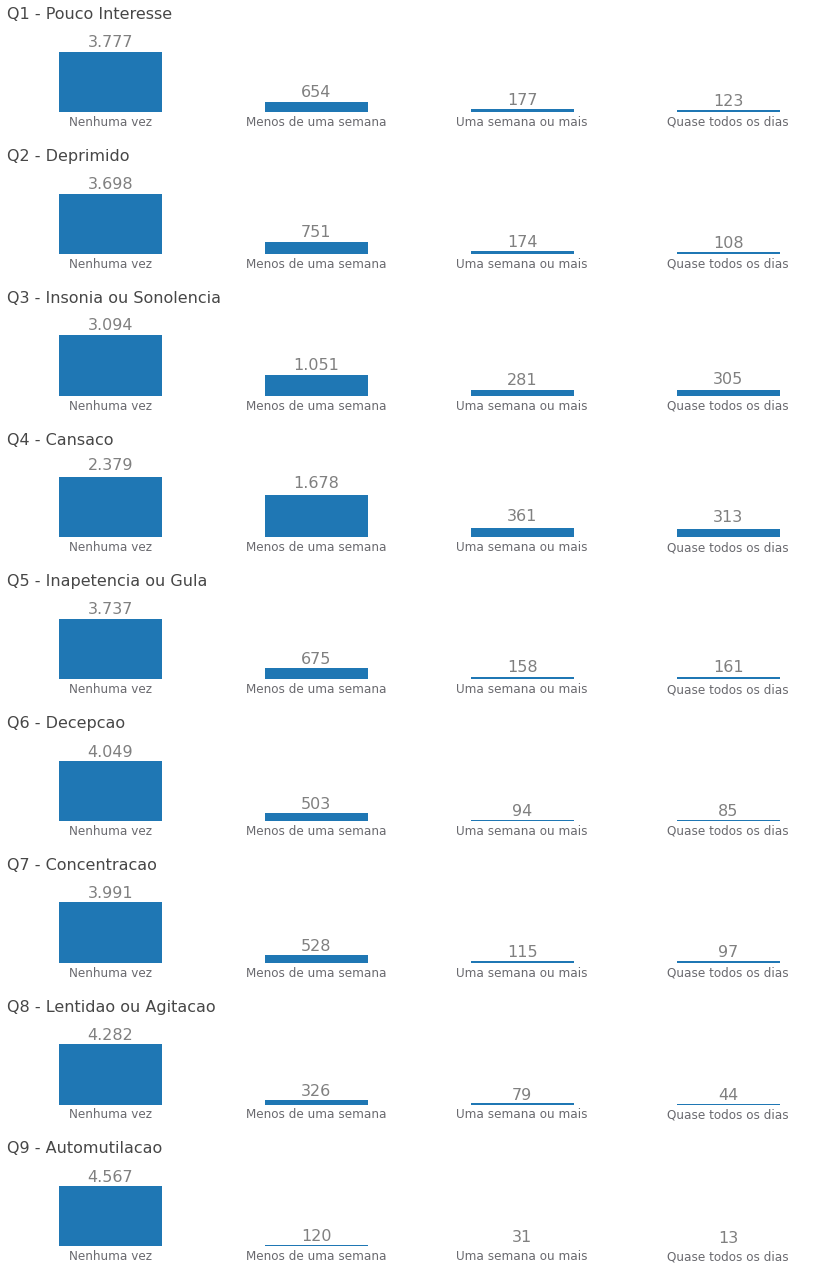

In [25]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (12,18), nrows = 9)

# Criando o gráfico para cada uma das perguntas realizadas no questionário
for i,f in enumerate(perguntas):
  df_new[f].value_counts().plot(kind='bar', ax = ax[i])
  # o título foi abreviado para facilitar a leitura dos gráficos
  rotulos(ax =  ax[i], y = df_new[f].value_counts() , distancia = 300, titulo = f) # ver a função rotulos criada no início do código
  ax[i].set_xticklabels(respostas_questionarios,fontdict={'fontsize':12,'horizontalalignment':'center'},color='#6a6a6f',rotation=0)

# plotando o gráfico
plt.tight_layout(pad = 2.0);

# deletando as variáveis que não serão mais utilizadas na análise
del i,f

Considerando que o score é calculado pela **soma das pontuações** das perguntas, aparentemente teremos poucas pessoas com sintomas depressivos em nosso dataset. Uma vez que aquelas que mais apresentam indícios depressivos todos os dias, são sempre minoria em todas as questões.

## Análise das Variáveis Categóricas

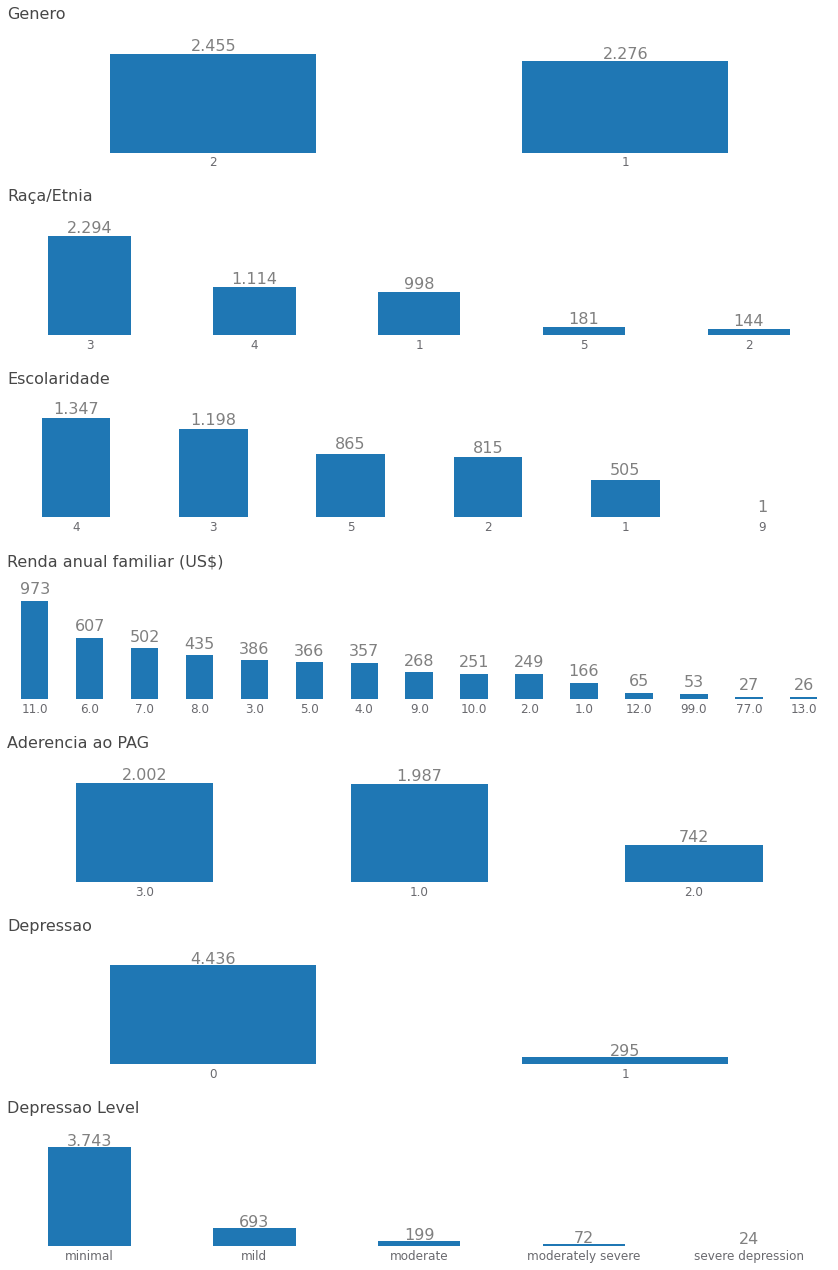

In [26]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (12,18), nrows = 7)

# criando o loop para cada uma das variáveis
for i,c in enumerate(categoricas):
  df_new[c].value_counts().sort_values(ascending=False).plot(kind='bar', ax = ax[i])
  rotulos(ax =  ax[i], y = list(df_new[c].value_counts()) , distancia = 70, titulo = c) # ver a função rotulos criada no início do código
  ax[i].set_xticklabels(df_new[c].value_counts().index,fontdict={'fontsize':12,'horizontalalignment':'center'},color='#6a6a6f',rotation=0)

# plotando os gráficos
plt.tight_layout(pad = 2.0);

# deletando as variáveis que não serão mais utilizadas na análise
del i,c

Pelos gráficos acima, observamos que a pesquisa manteve um **equilíbrio** entre os gêneros. Além disso, conforme esperado, a **minoria** das pessoas do dataset apresentam **depressão**. Ou seja, tem um score resultante maior do que 10.

## Análise das Variáveis com o PHQ-9

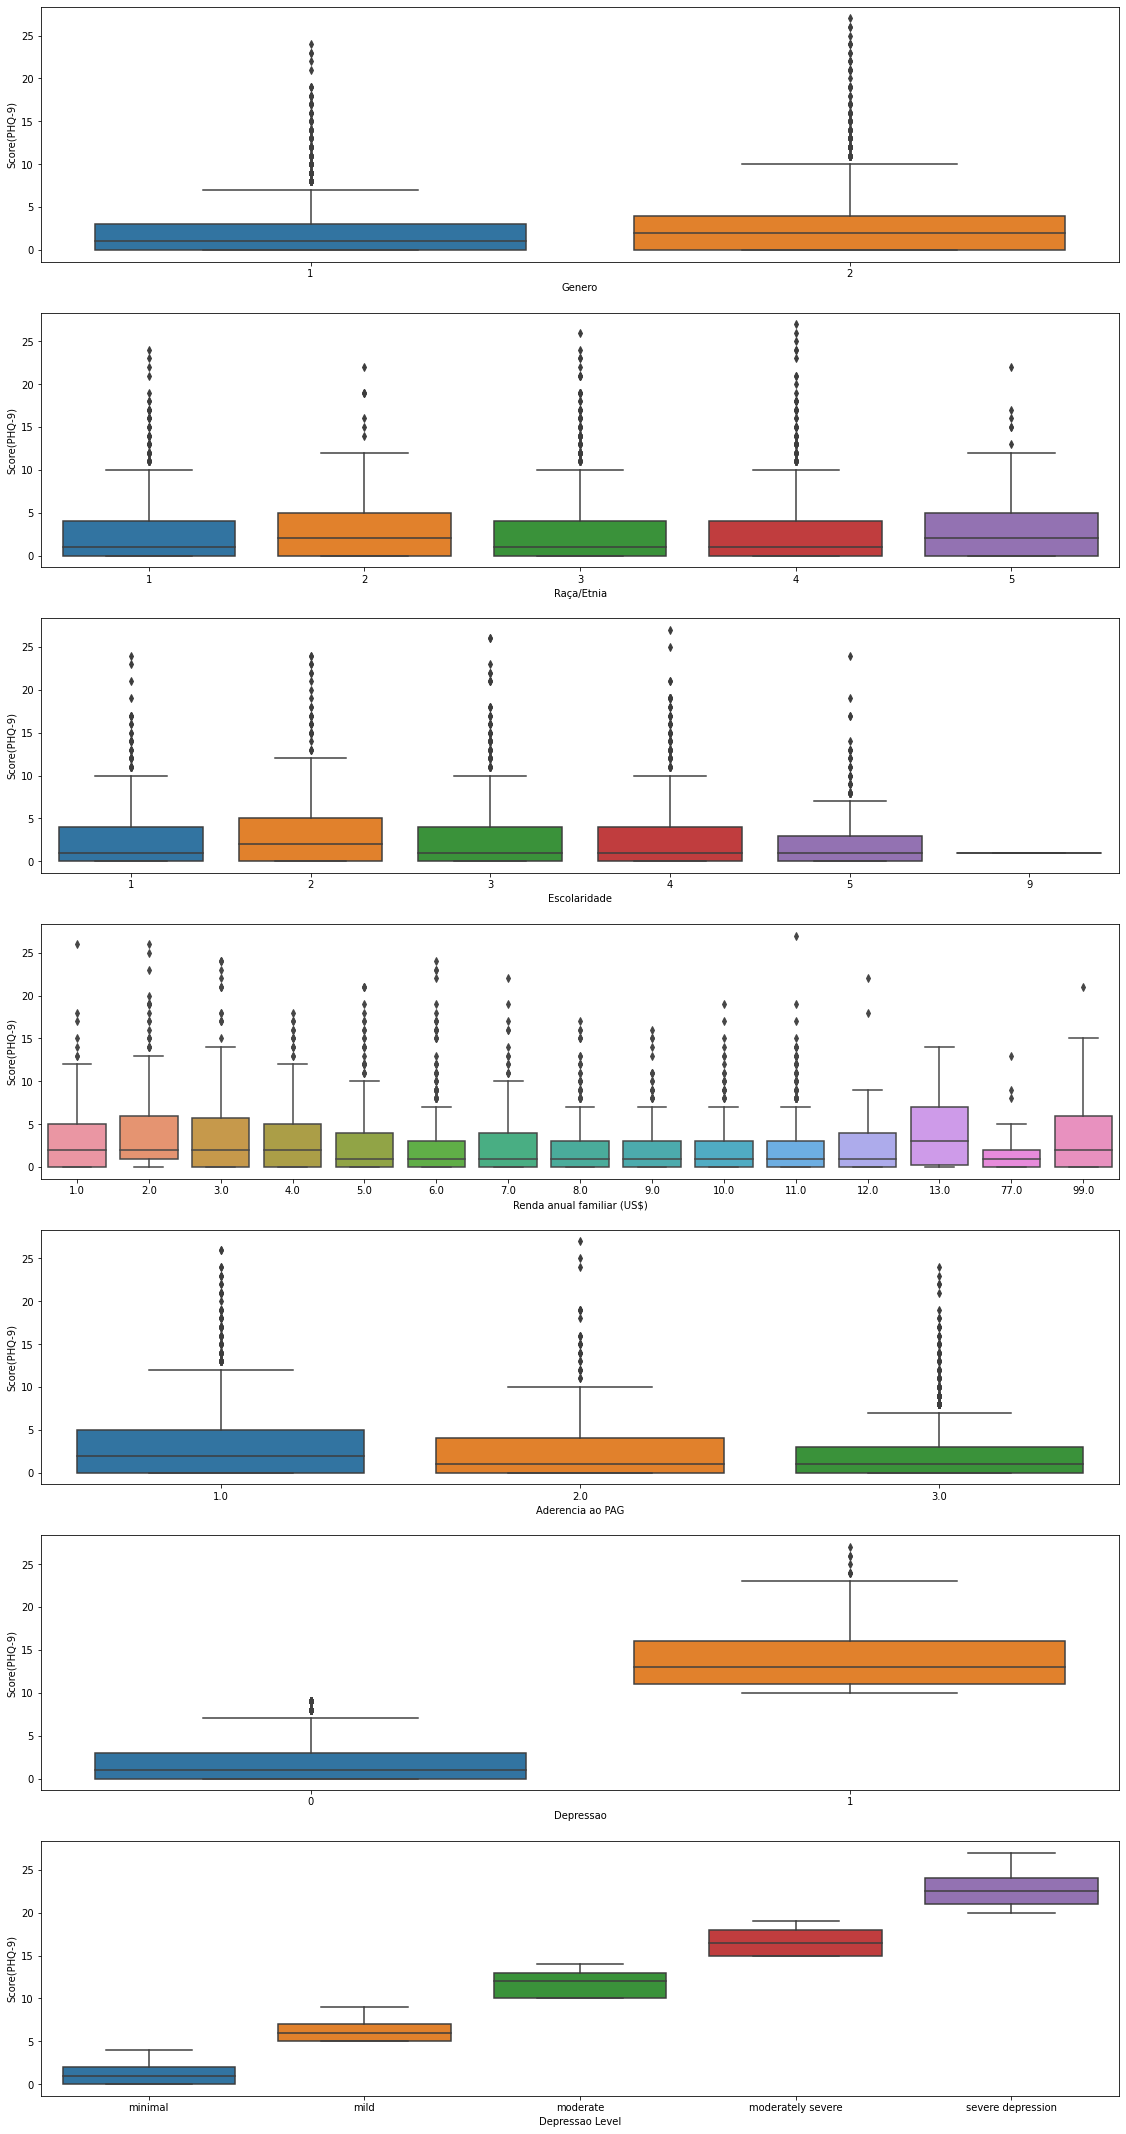

In [27]:
# criando a figure e o axis no matplotlib -> dúvidas? Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (16,30), nrows = 7)

# verificando a relacao entre o score do PHQ-9 e as variáveis categoricas
for i,c in enumerate(categoricas):
  sns.boxplot(x = c, y = 'Score(PHQ-9)', data = df_new, ax = ax[i]);

# plotando os gráficos
plt.tight_layout(pad = 2.0);

# deletando as variáveis que não serão mais utilizadas na análise
del i,c

Pelos gráficos acima, podemos supor que:
* As mulheres tem uma média de Score(PHQ-9) **maior** que o dos homens.
* Aparentemente **não há grande diferença** entre a média do Score(PHQ-9) calculado para cada uma das raças/etnias.
* Há uma **diferença** entre as médias do Score(PHQ-9) entre as diferentes classes de renda familiar.

Todas estas suposições serão melhor avaliadas posteriormente por meio de testes de hipótese. (Seção 03, atualmente estamos na Seção 02)

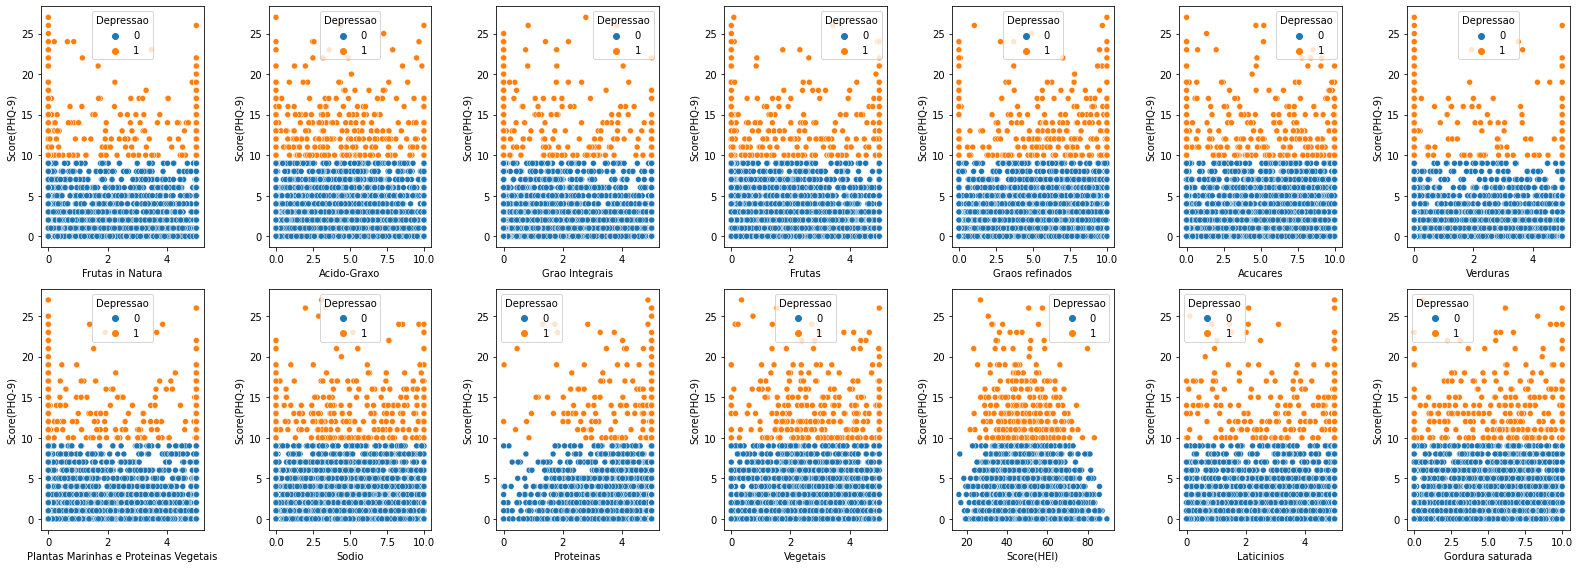

In [28]:
# criando a figure e o axis no matplotlib
# dúvidas sobre gráficos? -> Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (22,8), nrows = 2, ncols = 7)

# verificando a relacao entre o score do PHQ-9 e hábitos alimentares
alimentares = list(set(numericas) - set(['Score(PHQ-9)','Idade(anos)','Atividade Aerobica (min)'])) # criando uma lista apenas com as variáveis alimentares
for i in range(2):
  for j in range(7):
    a = alimentares[i*7 + j]
    sns.scatterplot(x = a, y = 'Score(PHQ-9)', hue = 'Depressao', data = df_new, ax = ax[i][j]);

# plotando os gráficos
plt.tight_layout();

# deletando as variáveis que não serão mais utilizadas na análise
del i,j,a

A partir da análise dos diferentes gráficos de dispersão não é possível encontrar uma relação entre a alimentação e o nível de depressão (ou o score do PHQ-9).

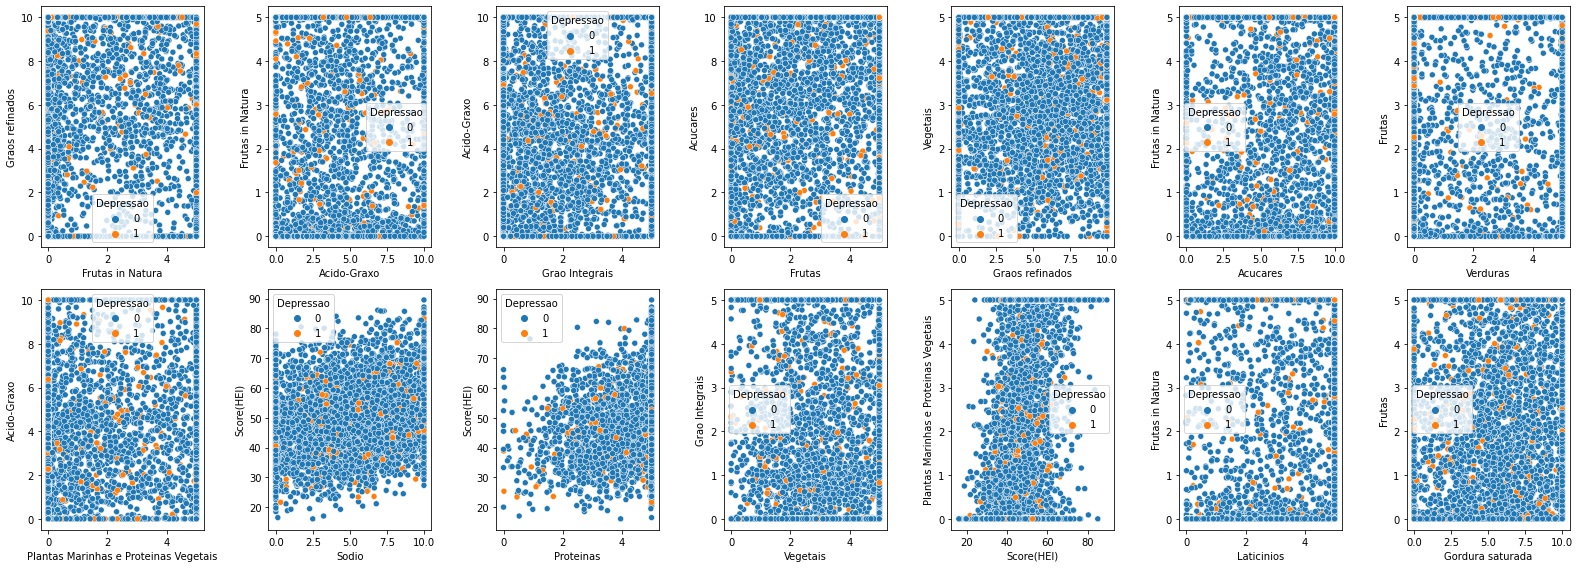

In [29]:
# tornando reprodutível com o seed
np.random.seed(43)

# criando a figure e o axis no matplotlib
# dúvidas sobre gráficos? -> Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (22,8), nrows = 2, ncols = 7)

# verificando a relação de hábitos alimentares entre si
alimentares = list(set(numericas) - set(['Score(PHQ-9)','Idade(anos)','Atividade Aerobica (min)'])) # criando uma lista apenas com as variáveis alimentares
for i in range(2):
  for j in range(7):
    a = i*7 + j
    b = np.random.randint(low = 0, high = 14) # numéro aleatório entre 0 e 13 para pegar um elemento da lista 'alimentares'
    sns.scatterplot(x = alimentares[a], y = alimentares[b], hue = 'Depressao', data = df_new, ax = ax[i][j]);

# plotando os gráficos
plt.tight_layout();

# deletando as variáveis que não serão mais utilizadas na análise
del i,j,a,b

Seguindo a conclusão encontrada nos últimos gráficos, ainda não é possível encontrar relação entre depressão e os hábitos alimentares.

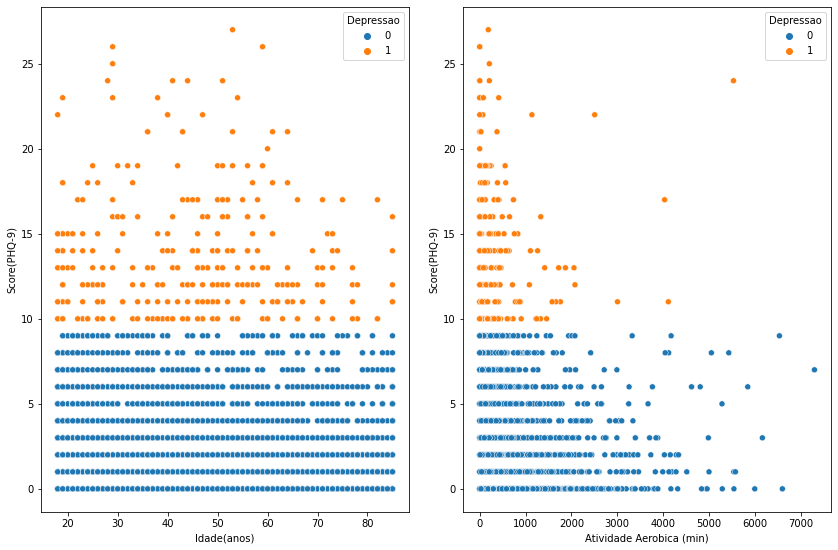

In [30]:
# criando a figure e o axis no matplotlib
# dúvidas sobre gráficos? -> Acesse: https://thalesferraz.medium.com/como-fazer-gr%C3%A1ficos-rotulados-em-python-8d6d72006eaf
fig, ax = plt.subplots(figsize = (12,8),ncols = 2)

# criando os gráficos para comparação de Idade e de Atividade Aeróbica com o Score PHQ-9
sns.scatterplot(x = 'Idade(anos)', y = 'Score(PHQ-9)', hue= 'Depressao',data = df_new, ax = ax[0])
sns.scatterplot(x = 'Atividade Aerobica (min)', y = 'Score(PHQ-9)', hue= 'Depressao',data = df_new, ax = ax[1])

# plotar os gráficos
plt.tight_layout(pad = 2.0);

Aparentemente, as pessoas praticam mais atividades físicas quando não tem depressão. Isto pode estar relacionado com o fato de que alguns dos sintomas relacionados a depressão são cansaço físico e emocional.

Além disso, parece haver igualdade entre as médias do Score (PHQ-9) para diferentes idades. Posteriormente, vamos realizar um teste de hipótese para verificar se esta igualdade persiste quando se compara amostra de pessoas que são consideradas **idosas**.

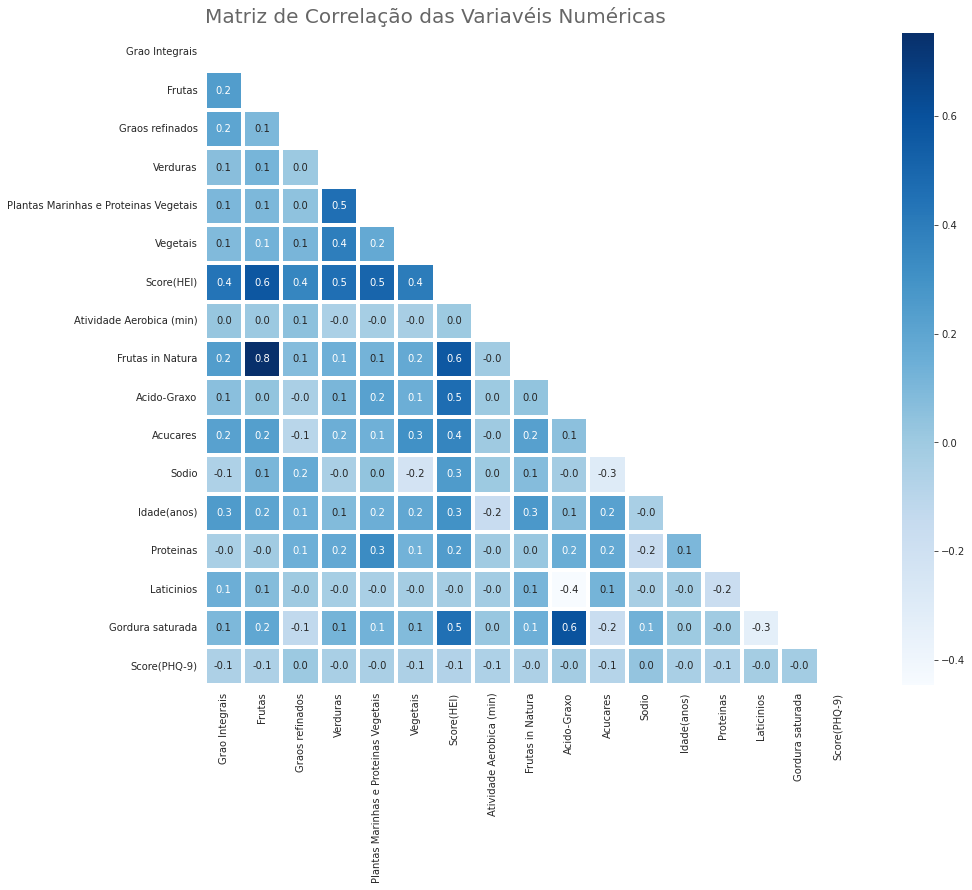

In [31]:
# criando a matriz de correlacao
matriz_de_correlacao = df_new[numericas].corr()

# criacao de uma mascara
mascara = np.zeros_like(matriz_de_correlacao)
mascara[np.triu_indices_from(mascara)] = True

# plotando o gráfico de correlação
with sns.axes_style('white'):
  fig,ax = plt.subplots(figsize=(16,12))
  sns.heatmap(matriz_de_correlacao,mask=mascara,square=True,annot=True,cmap='Blues',fmt='.1f',linewidths=3,ax=ax)
  ax.set_title('Matriz de Correlação das Variavéis Numéricas',loc='left',pad=10,fontdict={'fontsize':20},color='#666666')

Por fim, através do uso da [Matriz de Correlação de Pearson](https://datascience.eu/pt/matematica-e-estatistica/o-que-e-uma-matriz-de-correlacao/) não foi possível encontrar variáveis alimentares correlacionadas linearmente diretamente com nossa variável de interesse, ou seja, com o Score(PHQ-9).

# 3. Realizando algumas análises através de testes de hipótese.

Nesta seção, iremos avaliar algumas hipóteses que surgiram durante nossa análise, através de testes estatísticos. 

**É importante ressaltar que iremos considerar um nível de significância de 5% para todos os testes.**

### Há alguma diferença significativa da média do índice de PHQ - 9 em relação ao gênero? Ou seja, a média do índice das mulheres pode ser considerada maior que a dos homens?

Neste caso, temos duas amostras independentes, cujo desvio padrão populacional do Score(PHQ-9) é desconhecido.

Para realizar nosso teste nós assumimos as seguintes **premissas**:
* Os desvios padrões populacionais são desconhecidos.
* As amostras foram selecionadas aleatoriamente.
* As amostras são independentes.
* As amostras seguem uma distribuição normal (*já sabemos que não segue*), ou o tamanho de cada amostra é maior que 30. (iremos descobrir nos códigos abaixo)

In [32]:
# quantidade de registros e se é maior que 30 em cada amostra
df_new['Genero'].value_counts()

2    2455
1    2276
Name: Genero, dtype: int64

In [33]:
# verificando a média do Score(PHQ-9) em relação ao gênero
df_new.groupby('Genero')['Score(PHQ-9)'].mean().round(2)

Genero
1    2.32
2    3.14
Name: Score(PHQ-9), dtype: float64

Nossa **hipótese nula** é de que os homens tem média do score maior ou igual a média do score das mulheres.

Já nossa **hipótese alternativa** é que as mulheres tem média do score maior que a dos homens.

Para isso, vamos realizar um teste-T unicaudal à direita. Mas antes, vamos verificar se as variâncias das duas amostras podem ser consideradas iguais através do teste de levene.

In [34]:
# antes de realizarmos nosso teste de hipótese, temos que verificar se as variâncias são iguais utilizando o teste de levene
df_new.groupby('Genero')['Score(PHQ-9)'].var()

Genero
1    11.970212
2    15.611253
Name: Score(PHQ-9), dtype: float64

In [35]:
# separando o dataset entre os gêneros
masc = df_new[df_new['Genero'] == 1]['Score(PHQ-9)']
fem  = df_new[df_new['Genero'] == 2]['Score(PHQ-9)']

# realizando o teste de levene (escolhido devido a não-normalidade dos dados e por ser mais robusto que o bartlett)
# https://towardsdatascience.com/levenes-test-for-equality-of-variances-explained-with-python-examples-f0445a19805f
levene(masc,fem)

LeveneResult(statistic=25.969684390663918, pvalue=3.6033363744774925e-07)

Portanto, após realizar nosso teste de levene para a igualdade de variâncias, temos evidências suficientes para considerar que as variâncias de nossas duas amostras não são iguais.

Agora, poderemos realizar o nosso teste T.

In [36]:
# realizando o teste t
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

ttest_ind(a = fem, b = masc, equal_var=False,alternative='greater')

Ttest_indResult(statistic=7.612332061925396, pvalue=1.615786594273094e-14)

Portanto, a partir de nosso teste estatístico, podemos considerar **ao nível de confiança de 95%** que as médias do score das mulheres são maiores que as médias do score dos homens.

### Há alguma diferença significativa da média do índice de PHQ - 9 em relação as raças/etnias entrevistadas? Ou será que a média do score de cada raça/etnia pode ser considerada igual?

Neste caso, temos várias amostras independentes, cujo desvio padrão populacional do Score(PHQ-9) é desconhecido. Nós queremos comparar a média do score dos grupos.

Para realizar nosso teste nós assumimos as seguintes **premissas**:
* As amostras são aleatórias.
* Grupos são independentes.
* A variável dependente (no nosso caso o score) é contínua
* A variável independente é categórica
* As amostras seguem uma distribuição normal (*já sabemos que não segue*), ou o tamanho de cada amostra é maior que 20. (iremos descobrir nos códigos abaixo)

In [37]:
# quantidade de registros de cada amostra
df_new['Raça/Etnia'].value_counts()

3    2294
4    1114
1     998
5     181
2     144
Name: Raça/Etnia, dtype: int64

In [38]:
# verificando a média do score de cada amostra
df_new.groupby('Raça/Etnia')['Score(PHQ-9)'].mean()

Raça/Etnia
1    2.749499
2    3.437500
3    2.603313
4    2.903950
5    2.911602
Name: Score(PHQ-9), dtype: float64

A ideia inicial é usar uma ANOVA 1-fator. Porém, antes temos que verificar se os grupos tem variâncias **aproximadamente iguais**.

In [39]:
# separando os grupos
grupo_01 = df_new[df_new['Raça/Etnia'] == 1]['Score(PHQ-9)']
grupo_02 = df_new[df_new['Raça/Etnia'] == 2]['Score(PHQ-9)']
grupo_03 = df_new[df_new['Raça/Etnia'] == 3]['Score(PHQ-9)']
grupo_04 = df_new[df_new['Raça/Etnia'] == 4]['Score(PHQ-9)']
grupo_05 = df_new[df_new['Raça/Etnia'] == 5]['Score(PHQ-9)']

# aplicando no teste de levene
levene(grupo_01, grupo_02,grupo_03, grupo_04, grupo_05)

LeveneResult(statistic=2.5755679576441888, pvalue=0.03576748669625215)

Portanto, após realizar nosso teste de levene para a igualdade de variâncias, temos evidências suficientes (**ao nível de confiança 95%**) para considerar que as variâncias de nossas amostras não são iguais.

Portanto, não poderemos usar a tradicional ANOVA 1-fator. Deveremos usar a ANOVA de Welch.

In [40]:
# Aplicando a ANOVA de Welch
pg.welch_anova(dv = 'Score(PHQ-9)', between = 'Raça/Etnia', data = df_new)

,Source,ddof1,ddof2,F,p-unc,np2
0,Raça/Etnia,4,608.836217,2.30289,0.05728,0.002235


Portanto, a partir de nosso teste estatístico, podemos considerar **ao nível de confiança de 95%** que as médias do score dos grupos são aproxidamente iguais. Não há evidências de que as raças/etnias tem uma média de score diferente.

### Há alguma diferença significativa da média do índice de PHQ - 9 em relação a renda anual familiar? Ou será que a média do score de cada grupo de renda pode ser considerada igual?

Neste caso, temos várias amostras independentes, cujo desvio padrão populacional do Score(PHQ-9) é desconhecido. Nós queremos comparar a média do score dos grupos.

Para realizar nosso teste nós assumimos as seguintes **premissas**:
* As amostras são aleatórias.
* Grupos são independentes.
* A variável dependente (no nosso caso o score) é contínua
* A variável independente é categórica
* As amostras seguem uma distribuição normal (*já sabemos que não segue*), ou o tamanho de cada amostra é maior que 20. (iremos descobrir nos códigos abaixo)

In [41]:
# quantidade de registros de cada amostra
df_new['Renda anual familiar (US$)'].value_counts()

11.0    973
6.0     607
7.0     502
8.0     435
3.0     386
5.0     366
4.0     357
9.0     268
10.0    251
2.0     249
1.0     166
12.0     65
99.0     53
77.0     27
13.0     26
Name: Renda anual familiar (US$), dtype: int64

In [42]:
# verificando a média do score de cada amostra
df_new.groupby('Renda anual familiar (US$)')['Score(PHQ-9)'].mean()

Renda anual familiar (US$)
1.0     3.246988
2.0     4.224900
3.0     3.878238
4.0     3.324930
5.0     3.095628
6.0     2.545305
7.0     2.458167
8.0     2.347126
9.0     2.227612
10.0    2.490040
11.0    2.065776
12.0    2.692308
13.0    4.346154
77.0    2.111111
99.0    3.547170
Name: Score(PHQ-9), dtype: float64

A ideia inicial é usar uma ANOVA 1-fator. Porém, antes temos que verificar se os grupos tem variâncias **aproximadamente iguais**.

In [43]:
# separando os grupos
grupo_01 = df_new[df_new['Renda anual familiar (US$)'] == 1]['Score(PHQ-9)']
grupo_02 = df_new[df_new['Renda anual familiar (US$)'] == 2]['Score(PHQ-9)']
grupo_03 = df_new[df_new['Renda anual familiar (US$)'] == 3]['Score(PHQ-9)']
grupo_04 = df_new[df_new['Renda anual familiar (US$)'] == 4]['Score(PHQ-9)']
grupo_05 = df_new[df_new['Renda anual familiar (US$)'] == 5]['Score(PHQ-9)']
grupo_06 = df_new[df_new['Renda anual familiar (US$)'] == 6]['Score(PHQ-9)']
grupo_07 = df_new[df_new['Renda anual familiar (US$)'] == 7]['Score(PHQ-9)']
grupo_08 = df_new[df_new['Renda anual familiar (US$)'] == 8]['Score(PHQ-9)']
grupo_09 = df_new[df_new['Renda anual familiar (US$)'] == 9]['Score(PHQ-9)']
grupo_10 = df_new[df_new['Renda anual familiar (US$)'] == 10]['Score(PHQ-9)']
grupo_11 = df_new[df_new['Renda anual familiar (US$)'] == 11]['Score(PHQ-9)']
grupo_12 = df_new[df_new['Renda anual familiar (US$)'] == 12]['Score(PHQ-9)']
grupo_13 = df_new[df_new['Renda anual familiar (US$)'] == 13]['Score(PHQ-9)']
grupo_77 = df_new[df_new['Renda anual familiar (US$)'] == 77]['Score(PHQ-9)']
grupo_99 = df_new[df_new['Renda anual familiar (US$)'] == 99]['Score(PHQ-9)']

# realizando o teste de levene (escolhido devido a não-normalidade dos dados)
# https://towardsdatascience.com/levenes-test-for-equality-of-variances-explained-with-python-examples-f0445a19805f
levene(grupo_01,grupo_02,grupo_03,grupo_04,grupo_05,grupo_06,grupo_07,grupo_08,grupo_09,grupo_10,grupo_11,grupo_12,grupo_13,grupo_77,grupo_99)

LeveneResult(statistic=8.744960326838626, pvalue=3.970537265153301e-19)

Portanto, após realizar nosso teste de levene para a igualdade de variâncias, temos evidências suficientes (**ao nível de confiança 95%**) para considerar que as variâncias de nossas amostras não são iguais.

Portanto, não poderemos usar a tradicional ANOVA 1-fator. Deveremos usar a **ANOVA de Welch**.

In [44]:
# Aplicando a ANOVA de Welch
pg.welch_anova(dv = 'Score(PHQ-9)', between = 'Renda anual familiar (US$)', data = df_new)

,Source,ddof1,ddof2,F,p-unc,np2
0,Renda anual familiar (US$),14,530.044955,8.369886,2.092383e-16,0.030616


Portanto, a partir de nosso teste estatístico, podemos considerar **ao nível de confiança de 95%** que existem evidências suficientes para considerar que nem todas as médias de grupos são iguais.

Agora é preciso identificar qual par de médias de grupos apresenta uma diferença significativa. Para isto, vamos utilizar o **Teste Post Hoc** não paramétrico de Games Howell.

**Este teste será usado porque não assume variâncias iguais, tamanhos de amostras iguais e nem amostras normais**. Ou seja, é o teste ideal para avaliar as nossas amostras.

In [45]:
# aplicando o teste não paramétrico Games Howell
df_gh = pg.pairwise_gameshowell(dv = 'Score(PHQ-9)', between = 'Renda anual familiar (US$)', data = df_new)

# o pg.pairwise_gameshowell retorna um Pandas DataFrame
df_gh[df_gh['pval'] <= 0.05].style.applymap(highlight_cells,subset=['pval'])

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
9,1.000000,11.000000,3.246988,2.065776,1.181212,0.337230,3.502689,192.417433,0.040825,0.381342
17,2.000000,6.000000,4.224900,2.545305,1.679595,0.368944,4.552441,352.212654,0.000701,0.395229
18,2.000000,7.000000,4.224900,2.458167,1.766732,0.364667,4.844776,336.715285,0.000191,0.441867
19,2.000000,8.000000,4.224900,2.347126,1.877773,0.368478,5.096027,348.415577,0.000057,0.461993
20,2.000000,9.000000,4.224900,2.227612,1.997288,0.383923,5.202311,387.240869,0.000032,0.465913
21,2.000000,10.000000,4.224900,2.490040,1.734860,0.395214,4.389670,412.724454,0.001357,0.392739
22,2.000000,11.000000,4.224900,2.065776,2.159124,0.348932,6.187806,286.069832,0.000000,0.615234
29,3.000000,6.000000,3.878238,2.545305,1.332934,0.288943,4.613144,669.238383,0.000463,0.317739
30,3.000000,7.000000,3.878238,2.458167,1.420071,0.283462,5.009741,625.049159,0.000072,0.357350
31,3.000000,8.000000,3.878238,2.347126,1.531112,0.288347,5.309955,644.845810,0.000015,0.380173


A partir do nosso teste de **Games Howell**, selecionamos apenas aqueles pares de grupos que apresentam uma diferença significativa, ou seja, `p-val` menor do que 5%.

Deixamos com fundo vermelho, apenas os pares que apresentam um `p-val` maior que 1%. Ou seja, para estes pares não temos evidências a 99% de confiança que eles tem médias do score diferentes.

### Há alguma diferença significativa da média do índice de PHQ - 9 em relação aos idosos? Ou seja, a média do índice dos idosos pode ser considerada menor que a dos não-idosos?

Neste caso, temos duas amostras independentes, cujo desvio padrão populacional do Score(PHQ-9) é desconhecido.

Para realizar nosso teste nós assumimos as seguintes **premissas**:
* Os desvios padrões populacionais são desconhecidos.
* As amostras foram selecionadas aleatoriamente.
* As amostras são independentes.
* As amostras seguem uma distribuição normal (*já sabemos que não segue*), ou o tamanho de cada amostra é maior que 30. (iremos descobrir nos códigos abaixo)

Além disso, foi considerado como **idosa as pessoas que tems  mais de 65** anos de idade. Este valor foi obtido a partir do seguinte artigo: [Defining ‘elderly’ in clinical practice guidelines for pharmacotherapy](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4282767/#:~:text=Ageing%2C%20an%20inevitable%20process%2C%20is,referred%20to%20as%20%27elderly%27.).

In [46]:
# criando a variável idoso no dataset
# a idade para ser considerado idoso nos EUA foi retirada deste artigo -> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4282767/#:~:text=Ageing%2C%20an%20inevitable%20process%2C%20is,referred%20to%20as%20%27elderly%27.
df_new['Idoso'] = np.where(df_new['Idade(anos)'] >= 65, 1 ,0)

# verificando a quantidade de idosos e não idosos
df_new['Idoso'].value_counts()

0    3762
1     969
Name: Idoso, dtype: int64

In [47]:
# verificando a média do SCORE PHQ-9 em relação aos idosos
df_new.groupby('Idoso')['Score(PHQ-9)'].mean()

Idoso
0    2.864700
1    2.266254
Name: Score(PHQ-9), dtype: float64

Nossa **hipótese nula** é de que os idosos tem média do score maior ou igual a média do score dos não-idosos.

Já nossa **hipótese alternativa** é que os idosos tem média do score menor que a dos não-idosos.

Para isso, vamos realizar um teste-T unicaudal à esquerda. Mas antes, vamos verificar se as **variâncias** das duas amostras podem ser consideradas iguais através do **teste de levene**.

In [48]:
# separando o dataset entre os gêneros
idoso = df_new[df_new['Idoso'] == 1]['Score(PHQ-9)']
nao_idoso  = df_new[df_new['Idoso'] == 0]['Score(PHQ-9)']

# realizando o teste de levene (escolhido devido a não-normalidade dos dados)
# https://towardsdatascience.com/levenes-test-for-equality-of-variances-explained-with-python-examples-f0445a19805f
levene(idoso,nao_idoso)

LeveneResult(statistic=19.08489768736886, pvalue=1.2770682360492525e-05)

Portanto, após realizar nosso teste de levene para a **igualdade de variâncias**, temos evidências suficientes para considerar que as variâncias de nossas duas amostras não são iguais.

Agora, poderemos realizar o nosso teste T.

In [49]:
# realizando o teste t
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

ttest_ind(a = idoso, b = nao_idoso, equal_var=False, alternative = 'less')

Ttest_indResult(statistic=-5.074142996719469, pvalue=2.1431182545759139e-07)

Portanto, a partir de nosso teste estatístico, podemos considerar **ao nível de confiança de 95%** que as médias do score dos idosos são menores que as médias do score dos não-idosos.

#### Comparando através de Intervalos de Confiança

Intervalo de confiança é o intervalo que, com probabilidade conhecida, deverá conter o **valor real do nosso parâmetro** analisado.

Este intervalo de confiança sempre concorda com o nosso teste de hipótese. Portanto, o range dos idosos não deve se **sobrepor** ao range de não idosos.

Com 95% de confiança o valor esperado do índice PHQ-9 para idoso é de : 1.97 - 2.04
Com 95% de confiança o valor esperado do índice PHQ-9 para não-idoso é de : 2.66 - 2.72



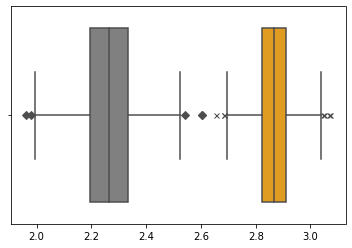

In [50]:
# calculando os intervalos de confiança para idosos e não idosos ao nível de confiança 95%
# https://towardsdatascience.com/how-to-calculate-confidence-intervals-in-python-a8625a48e62b

# gerando amostras aleatórias com reposição e calculando as médias
values_idoso = [np.random.choice(idoso, size = len(idoso), replace = True).mean() for i in range(1000)]
values_nao_idoso = [np.random.choice(nao_idoso, size = len(nao_idoso), replace = True).mean() for i in range(1000)]

# calculando o percentil de 2,5% e de 95%
percentil_idoso = np.percentile(values_idoso, [0.025, 0.95])
percentil_nao_idoso = np.percentile(values_nao_idoso, [0.025, 0.95])

# Printando os resultados
print('Com 95% de confiança o valor esperado do índice PHQ-9 para idoso é de : {:.2f} - {:.2f}'.format(percentil_idoso[0], percentil_idoso[1]))
print('Com 95% de confiança o valor esperado do índice PHQ-9 para não-idoso é de : {:.2f} - {:.2f}'.format(percentil_nao_idoso[0], percentil_nao_idoso[1]))
print()

# definindo parâmetros para diferenciação dos boxplots
# https://matplotlib.org/3.1.1/gallery/statistics/boxplot.html
flierprops1 = dict(linestyle='None', marker = 'D')
flierprops2 = dict(linestyle='None', marker = 'x')

# plotando os dois boxplots para verificar a não sobreposição
sns.boxplot(x = values_idoso, color = 'Grey', flierprops = flierprops1)
sns.boxplot(x = values_nao_idoso, color = 'Orange', flierprops = flierprops2);

Conforme havíamos inferido pelo nosso teste estatístico, verificamos novamente que o score dos idosos são menores que o score dos não idosos.

## Há alguma associação entre a Escolaridade e a Renda anual familiar?

Agora vamos verificar se existe a associação entre duas variáveis categóricas utilizando **teste qui-quadrado de independência**.

In [51]:
# retirando a única pessoa que não respondeu para atender aos pressupostos do teste
escolaridade = df_new[df_new['Escolaridade'] != 9]['Escolaridade']

# Realizando a construção da tabela de contingência
# https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d
contingency = pd.crosstab(escolaridade,df_new['Renda anual familiar (US$)'])
contingency

Renda anual familiar (US$),1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,77.0,99.0
Escolaridade,,,,,,,,,,,,,,,
1,21,39,80,87,65,74,51,24,12,15,10,8,3,6,10
2,35,65,94,88,70,129,104,67,31,29,63,8,9,4,19
3,56,61,106,90,115,166,136,113,82,70,161,19,7,6,10
4,48,74,86,74,84,172,142,139,84,89,312,20,6,8,9
5,6,10,20,18,32,66,69,92,59,48,427,10,1,3,4


In [52]:
# Teste qui quadrado para o teste de independência
c, p_value, dof, expected = chi2_contingency(contingency)

# verificando o p-valor
p_value

1.9538352186439304e-168

Portanto, a partir de nosso teste estatístico, podemos considerar **ao nível de confiança de 95%** que temos evidências para rejeitar a hipótese nula e considerar que as duas variáveis são **dependentes**.

# 4. Considerações Finais

Todos os nossos dados são baseados em uma pesquisa **americana** feita entre os anos de **2005 e 2006**. Nós estamos considerando que toda a pesquisa foi feita de forma correta e que representam muito bem a população.

Naturalmente, muito tempo se passou desde 2005 até hoje. A diversidade de etnias pode ter mudado, as crises fianceiras podem ter alterado as rendas anuais das famílias ou a escolaridade da população também pode ter evoluído ao longo do tempo. 

Portanto, muitas das conclusões tiradas aqui se **restringem** a apenas este dataset.

Além disso, para reforçar nossa análise sobre os sintomas de depressão, poderíamos utilizar **outros testes** e não nos restringir a apenas o PHQ-9.